In [ ]:
#***************************************************************************
cd [the directory that you clone this repository]/pathological_criteria_based_DL
#***************************************************************************

In [1]:
from __future__ import print_function
import warnings
warnings.filterwarnings("ignore")
import keras
from keras.datasets import cifar10
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, BatchNormalization, Flatten
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam
import efficientnet.keras as enet
import glob
import numpy as np
import os, cv2
from PIL import Image
import matplotlib.pyplot as plt 

In [2]:
#class num、class name、image_size
num_classes = 2
model_number = 4

if model_number == 0:
    image_size = 224
elif model_number == 1:
    image_size = 240
elif model_number == 2:
    image_size = 260
elif model_number == 3:
    image_size = 300
elif model_number == 4:
    image_size = 380
elif model_number == 5:
    image_size = 456
elif model_number == 6:
    image_size = 528
elif model_number == 7:
    image_size = 600
else:
    print('set model_number 0 to 7')

In [3]:
from keras.backend import sigmoid

class SwishActivation(Activation):
    
    def __init__(self, activation, **kwargs):
        super(SwishActivation, self).__init__(activation, **kwargs)
        self.__name__ = 'swish_act'

def swish_act(x, beta = 1):
    return (x * sigmoid(beta * x))

from keras.utils.generic_utils import get_custom_objects
get_custom_objects().update({'swish_act': SwishActivation(swish_act)})

In [4]:
if model_number == 0:
    model = enet.EfficientNetB0(include_top=False, input_shape=(image_size,image_size,3), pooling='avg', weights='imagenet')
elif model_number == 1:
    model = enet.EfficientNetB1(include_top=False, input_shape=(image_size,image_size,3), pooling='avg', weights='imagenet')
elif model_number == 2:
    model = enet.EfficientNetB2(include_top=False, input_shape=(image_size,image_size,3), pooling='avg', weights='imagenet')
elif model_number == 3:
    model = enet.EfficientNetB3(include_top=False, input_shape=(image_size,image_size,3), pooling='avg', weights='imagenet')
elif model_number == 4:
    model = enet.EfficientNetB4(include_top=False, input_shape=(image_size,image_size,3), pooling='avg', weights='imagenet')
elif model_number == 5:
    model = enet.EfficientNetB5(include_top=False, input_shape=(image_size,image_size,3), pooling='avg', weights='imagenet')
elif model_number == 6:
    model = enet.EfficientNetB6(include_top=False, input_shape=(image_size,image_size,3), pooling='avg', weights='imagenet')
elif model_number == 7:
    model = enet.EfficientNetB7(include_top=False, input_shape=(image_size,image_size,3), pooling='avg', weights='imagenet')
else:
    print('set model_number 0 to 7')


# Adding 2 fully-connected layers to B4.
x = model.output

x = BatchNormalization()(x)
x = Dropout(0.7)(x)

x = Dense(512)(x)
x = BatchNormalization()(x)
x = Activation(swish_act)(x)
x = Dropout(0.5)(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = Activation(swish_act)(x)

# Output layer
predictions = Dense(num_classes, activation="softmax")(x)


model_1 = Model(inputs = model.input, outputs = predictions)

In [5]:
if model_number == 0:
    model = enet.EfficientNetB0(include_top=False, input_shape=(image_size,image_size,3), pooling='avg', weights='imagenet')
elif model_number == 1:
    model = enet.EfficientNetB1(include_top=False, input_shape=(image_size,image_size,3), pooling='avg', weights='imagenet')
elif model_number == 2:
    model = enet.EfficientNetB2(include_top=False, input_shape=(image_size,image_size,3), pooling='avg', weights='imagenet')
elif model_number == 3:
    model = enet.EfficientNetB3(include_top=False, input_shape=(image_size,image_size,3), pooling='avg', weights='imagenet')
elif model_number == 4:
    model = enet.EfficientNetB4(include_top=False, input_shape=(image_size,image_size,3), pooling='avg', weights='imagenet')
elif model_number == 5:
    model = enet.EfficientNetB5(include_top=False, input_shape=(image_size,image_size,3), pooling='avg', weights='imagenet')
elif model_number == 6:
    model = enet.EfficientNetB6(include_top=False, input_shape=(image_size,image_size,3), pooling='avg', weights='imagenet')
elif model_number == 7:
    model = enet.EfficientNetB7(include_top=False, input_shape=(image_size,image_size,3), pooling='avg', weights='imagenet')
else:
    print('set model_number 0 to 7')
    
# Adding 2 fully-connected layers to B4.
x = model.output

x = BatchNormalization()(x)
x = Dropout(0.7)(x)

x = Dense(512)(x)
x = BatchNormalization()(x)
x = Activation(swish_act)(x)
x = Dropout(0.5)(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = Activation(swish_act)(x)

# Output layer
predictions = Dense(num_classes, activation="softmax")(x)


model_2 = Model(inputs = model.input, outputs = predictions)

In [6]:
if model_number == 0:
    model = enet.EfficientNetB0(include_top=False, input_shape=(image_size,image_size,3), pooling='avg', weights='imagenet')
elif model_number == 1:
    model = enet.EfficientNetB1(include_top=False, input_shape=(image_size,image_size,3), pooling='avg', weights='imagenet')
elif model_number == 2:
    model = enet.EfficientNetB2(include_top=False, input_shape=(image_size,image_size,3), pooling='avg', weights='imagenet')
elif model_number == 3:
    model = enet.EfficientNetB3(include_top=False, input_shape=(image_size,image_size,3), pooling='avg', weights='imagenet')
elif model_number == 4:
    model = enet.EfficientNetB4(include_top=False, input_shape=(image_size,image_size,3), pooling='avg', weights='imagenet')
elif model_number == 5:
    model = enet.EfficientNetB5(include_top=False, input_shape=(image_size,image_size,3), pooling='avg', weights='imagenet')
elif model_number == 6:
    model = enet.EfficientNetB6(include_top=False, input_shape=(image_size,image_size,3), pooling='avg', weights='imagenet')
elif model_number == 7:
    model = enet.EfficientNetB7(include_top=False, input_shape=(image_size,image_size,3), pooling='avg', weights='imagenet')
else:
    print('set model_number 0 to 7')
    
# Adding 2 fully-connected layers to B4.
x = model.output

x = BatchNormalization()(x)
x = Dropout(0.7)(x)

x = Dense(512)(x)
x = BatchNormalization()(x)
x = Activation(swish_act)(x)
x = Dropout(0.5)(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = Activation(swish_act)(x)

# Output layer
predictions = Dense(num_classes, activation="softmax")(x)



model_3 = Model(inputs = model.input, outputs = predictions)


In [7]:
if model_number == 0:
    model = enet.EfficientNetB0(include_top=False, input_shape=(image_size,image_size,3), pooling='avg', weights='imagenet')
elif model_number == 1:
    model = enet.EfficientNetB1(include_top=False, input_shape=(image_size,image_size,3), pooling='avg', weights='imagenet')
elif model_number == 2:
    model = enet.EfficientNetB2(include_top=False, input_shape=(image_size,image_size,3), pooling='avg', weights='imagenet')
elif model_number == 3:
    model = enet.EfficientNetB3(include_top=False, input_shape=(image_size,image_size,3), pooling='avg', weights='imagenet')
elif model_number == 4:
    model = enet.EfficientNetB4(include_top=False, input_shape=(image_size,image_size,3), pooling='avg', weights='imagenet')
elif model_number == 5:
    model = enet.EfficientNetB5(include_top=False, input_shape=(image_size,image_size,3), pooling='avg', weights='imagenet')
elif model_number == 6:
    model = enet.EfficientNetB6(include_top=False, input_shape=(image_size,image_size,3), pooling='avg', weights='imagenet')
elif model_number == 7:
    model = enet.EfficientNetB7(include_top=False, input_shape=(image_size,image_size,3), pooling='avg', weights='imagenet')
else:
    print('set model_number 0 to 7')

# Adding 2 fully-connected layers to B4.
x = model.output

x = BatchNormalization()(x)
x = Dropout(0.7)(x)

x = Dense(512)(x)
x = BatchNormalization()(x)
x = Activation(swish_act)(x)
x = Dropout(0.5)(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = Activation(swish_act)(x)

# Output layer
predictions = Dense(num_classes, activation="softmax")(x)



model_4 = Model(inputs = model.input, outputs = predictions)

#model = Model(inputs = model.input, outputs = predictions)

In [8]:
if model_number == 0:
    model = enet.EfficientNetB0(include_top=False, input_shape=(image_size,image_size,3), pooling='avg', weights='imagenet')
elif model_number == 1:
    model = enet.EfficientNetB1(include_top=False, input_shape=(image_size,image_size,3), pooling='avg', weights='imagenet')
elif model_number == 2:
    model = enet.EfficientNetB2(include_top=False, input_shape=(image_size,image_size,3), pooling='avg', weights='imagenet')
elif model_number == 3:
    model = enet.EfficientNetB3(include_top=False, input_shape=(image_size,image_size,3), pooling='avg', weights='imagenet')
elif model_number == 4:
    model = enet.EfficientNetB4(include_top=False, input_shape=(image_size,image_size,3), pooling='avg', weights='imagenet')
elif model_number == 5:
    model = enet.EfficientNetB5(include_top=False, input_shape=(image_size,image_size,3), pooling='avg', weights='imagenet')
elif model_number == 6:
    model = enet.EfficientNetB6(include_top=False, input_shape=(image_size,image_size,3), pooling='avg', weights='imagenet')
elif model_number == 7:
    model = enet.EfficientNetB7(include_top=False, input_shape=(image_size,image_size,3), pooling='avg', weights='imagenet')
else:
    print('set model_number 0 to 7')

# Adding 2 fully-connected layers to B4.
x = model.output

x = BatchNormalization()(x)
x = Dropout(0.7)(x)

x = Dense(512)(x)
x = BatchNormalization()(x)
x = Activation(swish_act)(x)
x = Dropout(0.5)(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = Activation(swish_act)(x)

# Output layer
predictions = Dense(num_classes, activation="softmax")(x)


model_5 = Model(inputs = model.input, outputs = predictions)


In [9]:
if model_number == 0:
    model = enet.EfficientNetB0(include_top=False, input_shape=(image_size,image_size,3), pooling='avg', weights='imagenet')
elif model_number == 1:
    model = enet.EfficientNetB1(include_top=False, input_shape=(image_size,image_size,3), pooling='avg', weights='imagenet')
elif model_number == 2:
    model = enet.EfficientNetB2(include_top=False, input_shape=(image_size,image_size,3), pooling='avg', weights='imagenet')
elif model_number == 3:
    model = enet.EfficientNetB3(include_top=False, input_shape=(image_size,image_size,3), pooling='avg', weights='imagenet')
elif model_number == 4:
    model = enet.EfficientNetB4(include_top=False, input_shape=(image_size,image_size,3), pooling='avg', weights='imagenet')
elif model_number == 5:
    model = enet.EfficientNetB5(include_top=False, input_shape=(image_size,image_size,3), pooling='avg', weights='imagenet')
elif model_number == 6:
    model = enet.EfficientNetB6(include_top=False, input_shape=(image_size,image_size,3), pooling='avg', weights='imagenet')
elif model_number == 7:
    model = enet.EfficientNetB7(include_top=False, input_shape=(image_size,image_size,3), pooling='avg', weights='imagenet')
else:
    print('set model_number 0 to 7')

# Adding 2 fully-connected layers to B4.
x = model.output

x = BatchNormalization()(x)
x = Dropout(0.7)(x)

x = Dense(512)(x)
x = BatchNormalization()(x)
x = Activation(swish_act)(x)
x = Dropout(0.5)(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = Activation(swish_act)(x)

# Output layer
predictions = Dense(num_classes, activation="softmax")(x)



model_6 = Model(inputs = model.input, outputs = predictions)

#model = Model(inputs = model.input, outputs = predictions)

In [10]:
model_1.compile(loss='categorical_crossentropy',
              optimizer=Adam(0.0001),
              metrics=['accuracy'])
model_2.compile(loss='categorical_crossentropy',
              optimizer=Adam(0.0001),
              metrics=['accuracy'])
model_3.compile(loss='categorical_crossentropy',
              optimizer=Adam(0.0001),
              metrics=['accuracy'])
model_4.compile(loss='categorical_crossentropy',
              optimizer=Adam(0.0001),
              metrics=['accuracy'])
model_5.compile(loss='categorical_crossentropy',
              optimizer=Adam(0.0001),
              metrics=['accuracy'])
model_6.compile(loss='categorical_crossentropy',
              optimizer=Adam(0.0001),
              metrics=['accuracy'])


In [16]:
model_1.load_weights("./model/best_model_cnn_1.h5")
model_2.load_weights("./model/best_model_cnn_2.h5")
model_3.load_weights("./model/best_model_cnn_3.h5")
model_4.load_weights("./model/best_model_cnn_4.h5")
model_5.load_weights("./model/best_model_cnn_5.h5")
model_6.load_weights("./model/best_model_cnn_6.h5")

In [17]:
from keras.preprocessing import image
def predict_picture(img_path):
    x_test = []
    image = Image.open(img_path)                       
    image = image.convert("RGB")    
    image = image.resize((image_size, image_size))
    data = np.asarray(image)        
    x_test.append(data)  
    x_test = np.array(x_test)
    x_test = x_test.astype('float32')
    x_test /= 255

    pred_1 = model_1.predict(x_test)
    pred_2 = model_2.predict(x_test)
    pred_3 = model_3.predict(x_test)
    pred_4 = model_4.predict(x_test)
    pred_5 = model_5.predict(x_test)
    pred_6 = model_6.predict(x_test)


    if pred_1[0][0] > pred_1[0][1] :
        print("cellularity")
        print(">>>Low")
        print("probability")
        print(pred_1[0][1]*100)
    else :
        print("cellularity")
        print(">>>High")
        print("probability")
        print(pred_1[0][1]*100)

    if pred_2[0][0] > pred_2[0][1] :
        print("Polarity")
        print(">>>Preserve")
        print("probability")
        print(pred_2[0][1]*100)
    else :
        print("Polarity")
        print(">>>Disturb")
        print("probability")
        print(pred_2[0][1]*100)

    if pred_3[0][0] > pred_3[0][1] :
        print("size")
        print(">>>small")
        print("probability")
        print(pred_3[0][1]*100)
    else :
        print("size")
        print(">>>large")
        print("probability")
        print(pred_3[0][1]*100)

    if pred_4[0][0] > pred_4[0][1] :
        print("size_variety")
        print(">>>various")
        print("probability")
        print(pred_4[0][0]*100)
    else :
        print("size_variety")
        print(">>>simillar")
        print("probability")
        print(pred_4[0][0]*100)
        
    if pred_5[0][0] > pred_5[0][1] :
        print("shape")
        print(">>>oval")
        print("probability")
        print(pred_5[0][1]*100)
    else :
        print("shape")
        print(">>>round")
        print("probability")
        print(pred_5[0][1]*100)

    if pred_6[0][0] > pred_6[0][1] :
        print("chromatin")
        print(">>>Negative")
        print("probability")
        print(pred_6[0][1]*100)
    else :
        print("chromatin")
        print(">>>Positive")
        print("probability")
        print(pred_6[0][1]*100)
    
    img_show = cv2.imread(img_path)
    plt.imshow(img_show)

    return pred_1[0][1], pred_2[0][1], pred_3[0][1], pred_4[0][0], pred_5[0][1], pred_6[0][1]

In [18]:
#******************************************************************************
image_path = './dataset/main_train/testing/Normal/N2_12_b_234.png'
#******************************************************************************

#******************************************************************************
#the image which is shown in the paper
# image_path = './dataset/main_train/testing/Normal/N2_12_b_234.png'
# image_path = './dataset/main_train/testing/Atypical/A_225_b_19.png'
# image_path = './dataset/main_train/testing/Dysplasia/D_208_b_1.png'
# image_path = './dataset/main_train/testing/CIS/C_223_b_0.png'
#******************************************************************************

cellularity
>>>Low
probability
0.10015841107815504
Polarity
>>>Preserve
probability
13.908784091472626
size
>>>small
probability
0.9487040340900421
size_variety
>>>simillar
probability
1.3468427583575249
shape
>>>oval
probability
0.1461191917769611
chromatin
>>>Negative
probability
0.07169340969994664


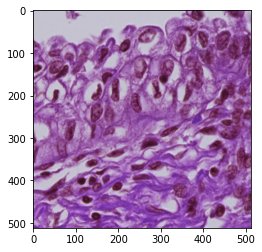

In [19]:
pred_1, pred_2, pred_3, pred_4, pred_5, pred_6 = predict_picture(image_path)